## Kyle Ah Von #57862609

This lab report will answer the questions related to the **analysis** portion of the lab manual for distance sensors. 

I am starting with setting up the environment before running any analysis.

In [186]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

# Setup Dataframes
Al_shinydataset = pd.read_excel("ShinyAluminumSlower.xlsx", skiprows = 1)
Al_sanddataset = pd.read_excel("Sandblastedaluminum.xlsx", skiprows = 1)
Steeldataset = pd.read_excel("SteelSampleSlower.xlsx", skiprows = 1)
Acrylicdataset = pd.read_excel("AcrylicSample.xlsx", skiprows = 1)

# Remove duplicate data points
Al_shinydataset = Al_shinydataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Al_sanddataset = Al_sanddataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Steeldataset = Steeldataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Acrylicdataset = Acrylicdataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])

# Split Dataset in forward versus backward motion, where forward is motion towards sensors
Al_shinyswitchidx = Al_shinydataset['Reference Distance (mm)'].idxmin()
Al_shinyforward = Al_shinydataset[Al_shinydataset['Time (s)'] < Al_shinydataset['Time (s)'].iloc[Al_shinyswitchidx]]
Al_shinybackward = Al_shinydataset[Al_shinydataset['Time (s)'] >= Al_shinydataset['Time (s)'].iloc[Al_shinyswitchidx]]

Al_sandswitchidx = Al_sanddataset['Reference Distance (mm)'].idxmin()
Al_sandforward = Al_sanddataset[Al_sanddataset['Time (s)'] < Al_sanddataset['Time (s)'].iloc[Al_sandswitchidx]]
Al_sandbackward = Al_sanddataset[Al_sanddataset['Time (s)'] >= Al_sanddataset['Time (s)'].iloc[Al_sandswitchidx]]

Steelswitchidx = Steeldataset['Reference Distance (mm)'].idxmin()
Steelforward =Steeldataset[Steeldataset['Time (s)'] < Steeldataset['Time (s)'].iloc[Steelswitchidx]]
Steelbackward = Steeldataset[Steeldataset['Time (s)'] >= Steeldataset['Time (s)'].iloc[Steelswitchidx]]

Acrylicswitchidx = Acrylicdataset['Reference Distance (mm)'].idxmin()
Acrylicforward = Acrylicdataset[Acrylicdataset['Time (s)'] < Acrylicdataset['Time (s)'].iloc[Acrylicswitchidx]]
Acrylicbackward = Acrylicdataset[Acrylicdataset['Time (s)'] >= Acrylicdataset['Time (s)'].iloc[Acrylicswitchidx]]




## Question 1
Prepare one graph for each proximity sensor showing the sensor signal for all test targets as a function of distance between the sensor and the test targets. Use the distance measured by the dial gauge as the reference distance.

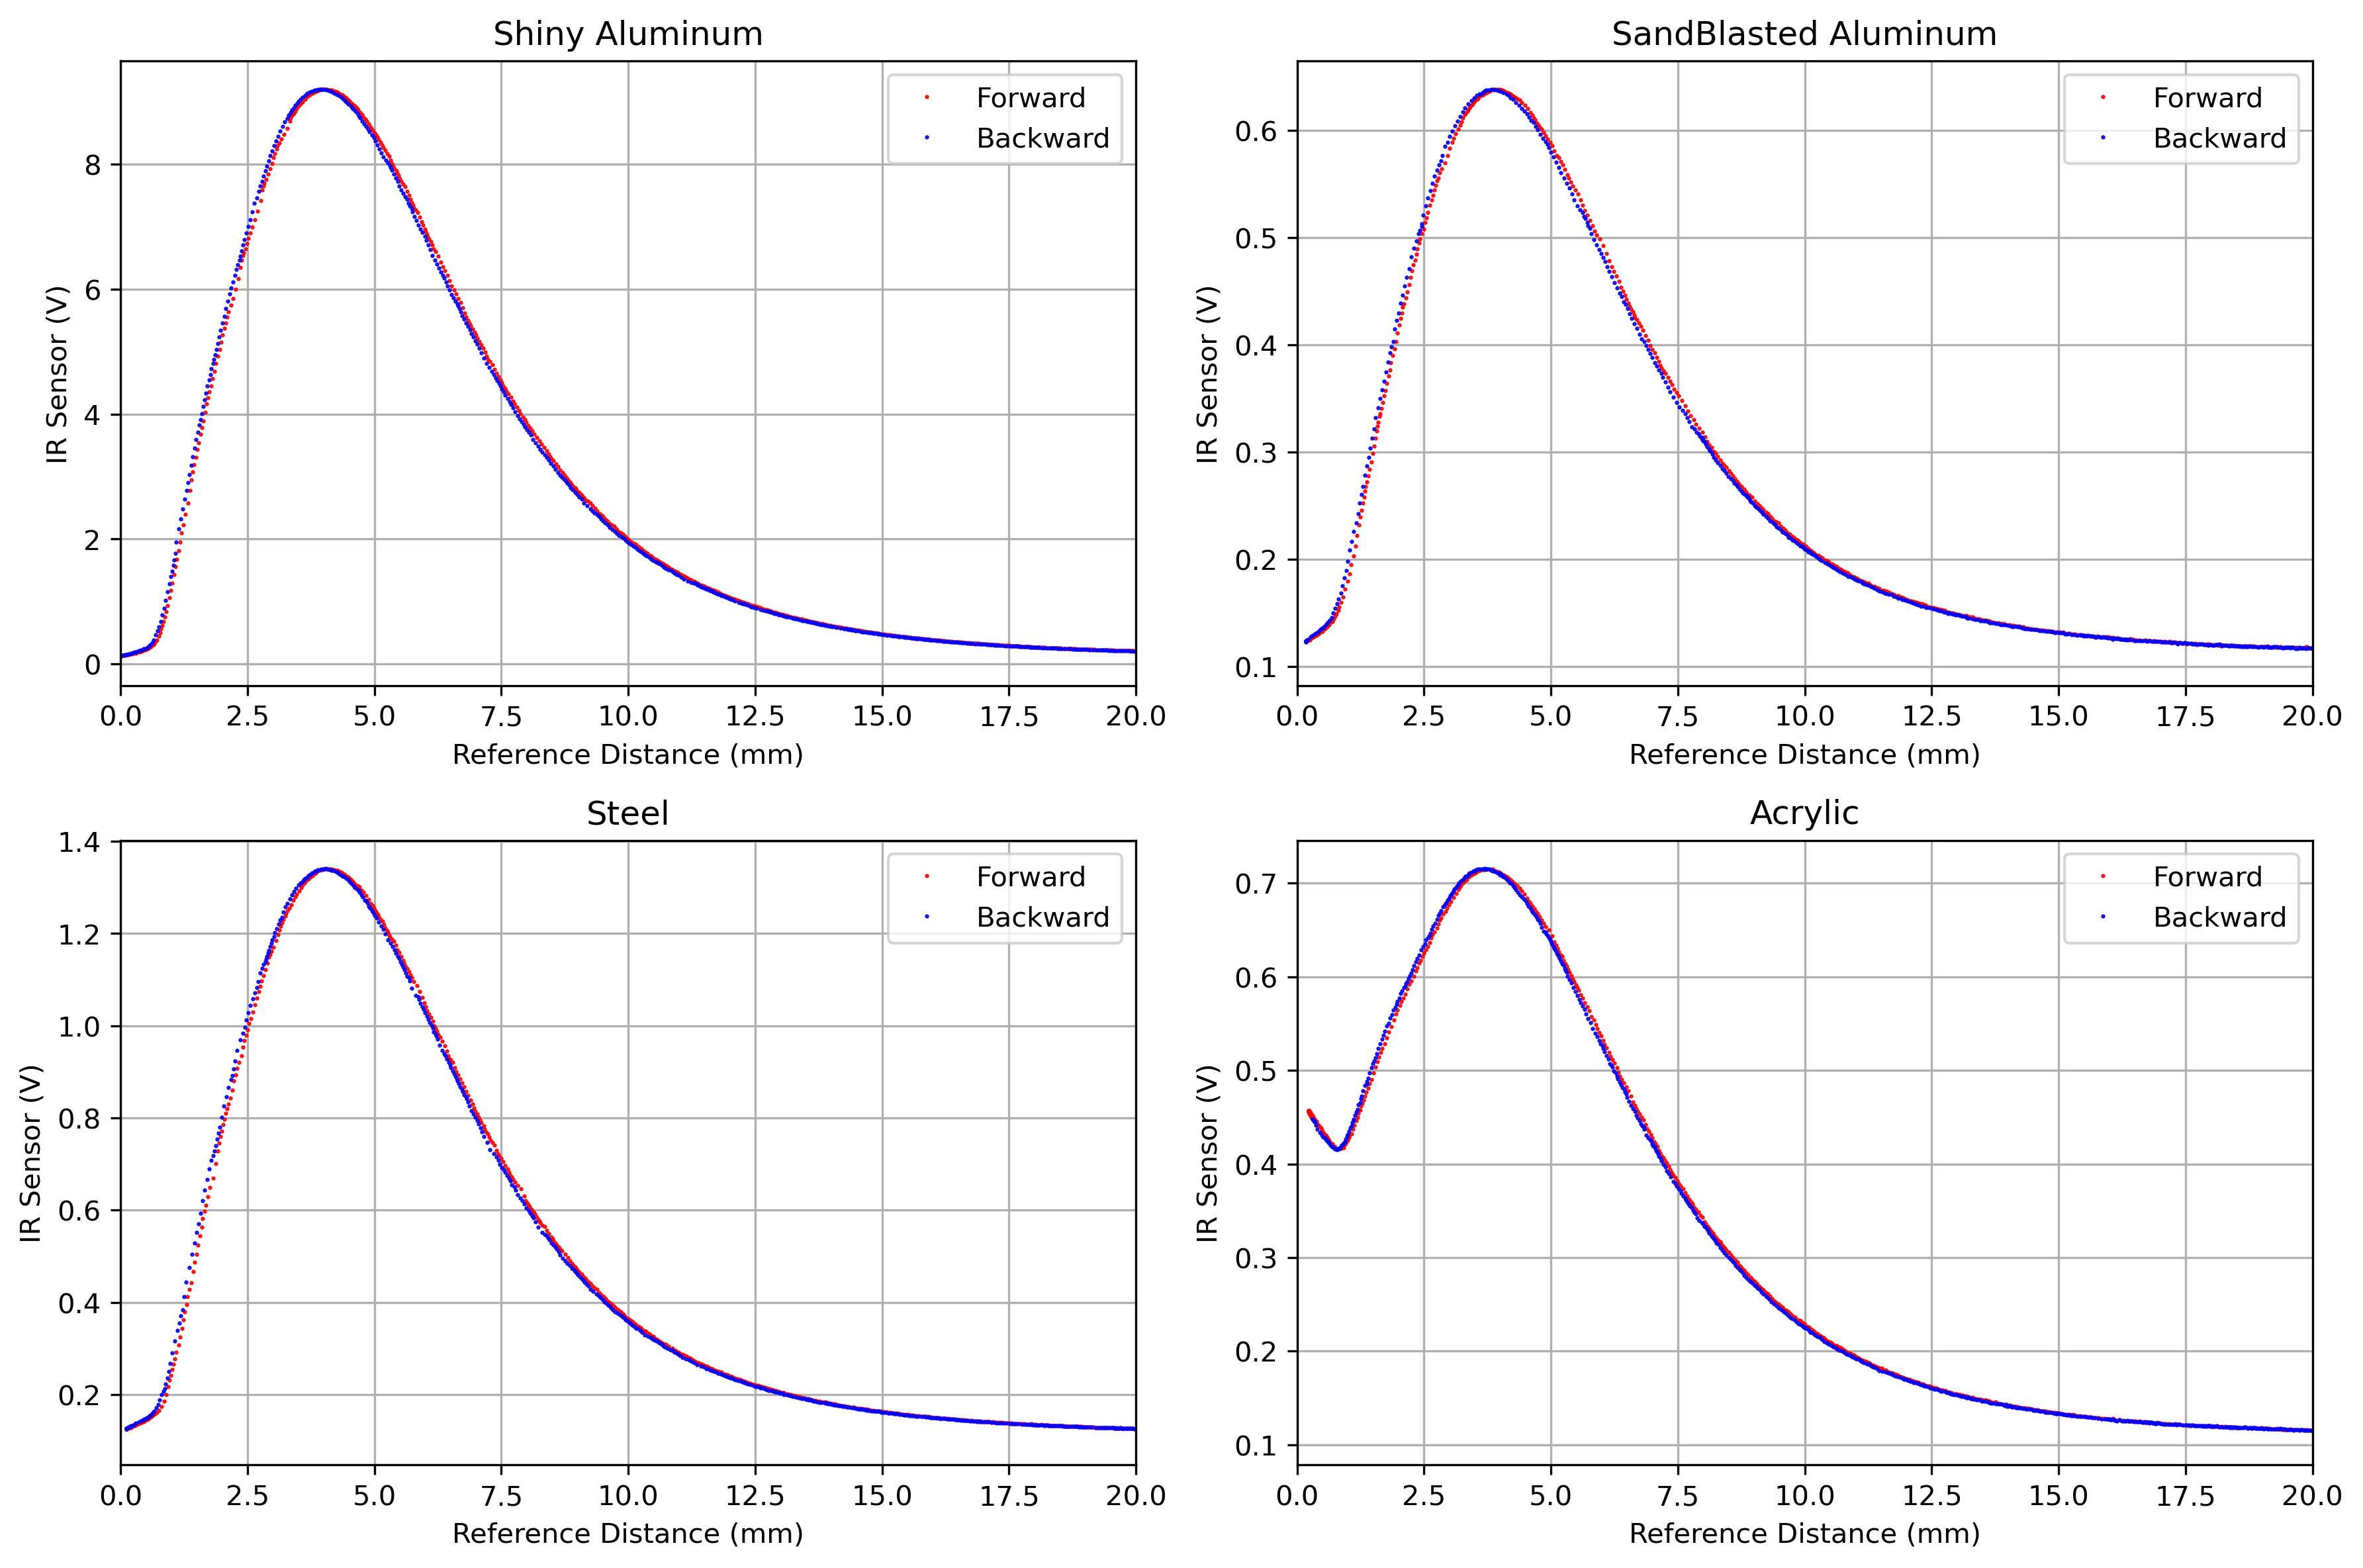

In [187]:
##IR Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 0, 20
# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('IR Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('IR Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('IR Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('IR Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



Note that each graph has a different Voltage scale, notably that Shiny Aluminum sample has a bigger range value. 

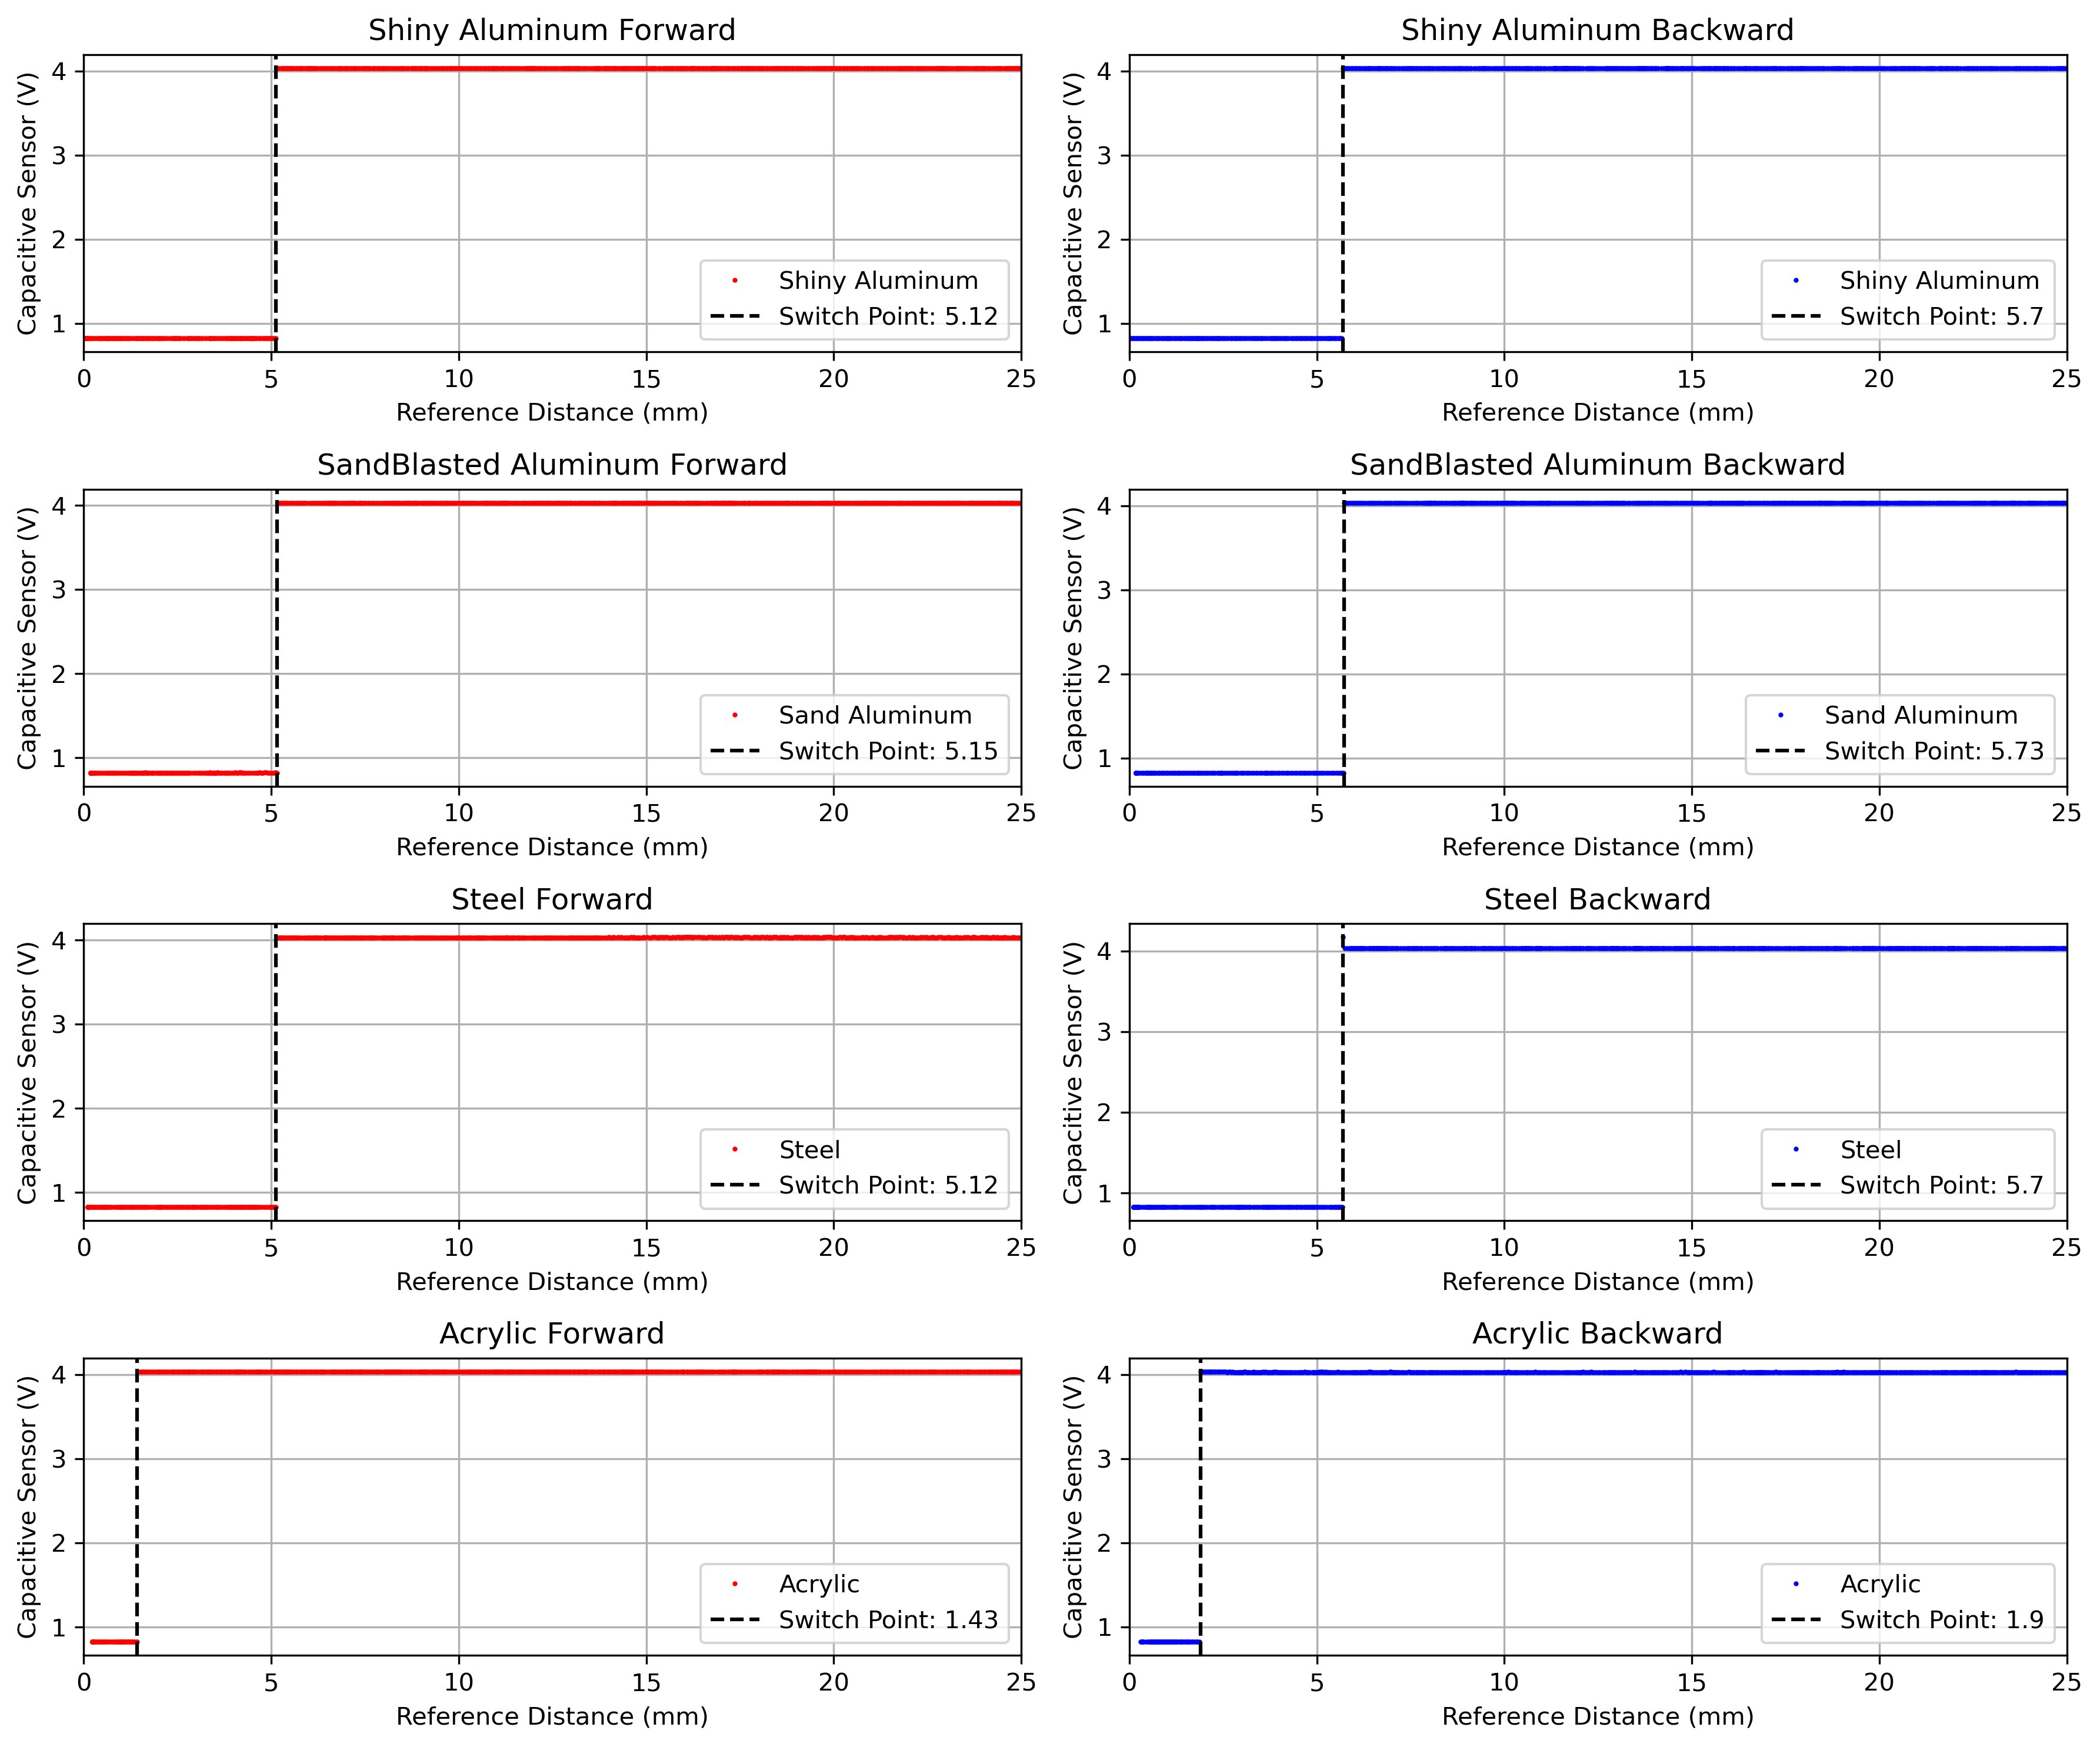

In [188]:
##Capacitive Sensor
# Define the threshold for the switch
threshold = 4.0  # Example threshold for switching from low to high

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 10), dpi=300)  # 4 rows, 2 columns

# Function to plot with vertical line
def plot_with_switch(ax, x_data, y_data, title, color, label):
    ax.plot(x_data, y_data, 'o', color=color, markersize=1, label=label)
    ax.set_xlim([0, 25])  # Restrict x-axis range
    ax.set_title(title)
    ax.set_xlabel('Reference Distance (mm)')
    ax.set_ylabel('Capacitive Sensor (V)')
    
    # Find the index where the sensor value crosses the threshold
    switch_index = np.where(y_data < threshold)[0]  # Get indices where y_data is below threshold
    if switch_index.size > 0:
        switch_value = x_data.iloc[switch_index[0]]  # Get the corresponding x value for the first occurrence
        # Add a vertical line at the switch value
        ax.axvline(switch_value, color='k', linestyle='--', label='Switch Point: ' + str(switch_value))

    ax.grid(True)
    ax.legend()

# Function to plot with vertical line
def plot_with_switch2(ax, x_data, y_data, title, color, label):
    ax.plot(x_data, y_data, 'o', color=color, markersize=1, label=label)
    ax.set_xlim([0, 25])  # Restrict x-axis range
    ax.set_title(title)
    ax.set_xlabel('Reference Distance (mm)')
    ax.set_ylabel('Capacitive Sensor (V)')
    
    # Find the index where the sensor value crosses the threshold
    switch_index = np.where(y_data > 1.0)[0]  # Get indices where y_data is below threshold
    if switch_index.size > 0:
        switch_value = x_data.iloc[switch_index[0]]  # Get the corresponding x value for the first occurrence
        # Add a vertical line at the switch value
        ax.axvline(switch_value, color='k', linestyle='--', label='Switch Point: ' + str(switch_value))

    ax.grid(True)
    ax.legend()

# Plot for Shiny Aluminum
plot_with_switch(axs[0, 0], Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['Capacitive Sensor (V)'], 'Shiny Aluminum Forward', 'r', 'Shiny Aluminum')
plot_with_switch2(axs[0, 1], Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['Capacitive Sensor (V)'], 'Shiny Aluminum Backward', 'b', 'Shiny Aluminum')

# Plot for SandBlasted Aluminum
plot_with_switch(axs[1, 0], Al_sandforward['Reference Distance (mm)'], Al_sandforward['Capacitive Sensor (V)'], 'SandBlasted Aluminum Forward', 'r', 'Sand Aluminum')
plot_with_switch2(axs[1, 1], Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['Capacitive Sensor (V)'], 'SandBlasted Aluminum Backward', 'b', 'Sand Aluminum')

# Plot for Steel
plot_with_switch(axs[2, 0], Steelforward['Reference Distance (mm)'], Steelforward['Capacitive Sensor (V)'], 'Steel Forward', 'r', 'Steel')
plot_with_switch2(axs[2, 1], Steelbackward['Reference Distance (mm)'], Steelbackward['Capacitive Sensor (V)'], 'Steel Backward', 'b', 'Steel')

# Plot for Acrylic
plot_with_switch(axs[3, 0], Acrylicforward['Reference Distance (mm)'], Acrylicforward['Capacitive Sensor (V)'], 'Acrylic Forward', 'r', 'Acrylic')
plot_with_switch2(axs[3, 1], Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['Capacitive Sensor (V)'], 'Acrylic Backward', 'b', 'Acrylic')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



The extract point after the switch point represents the return motion. Which can explain hysteresis. 

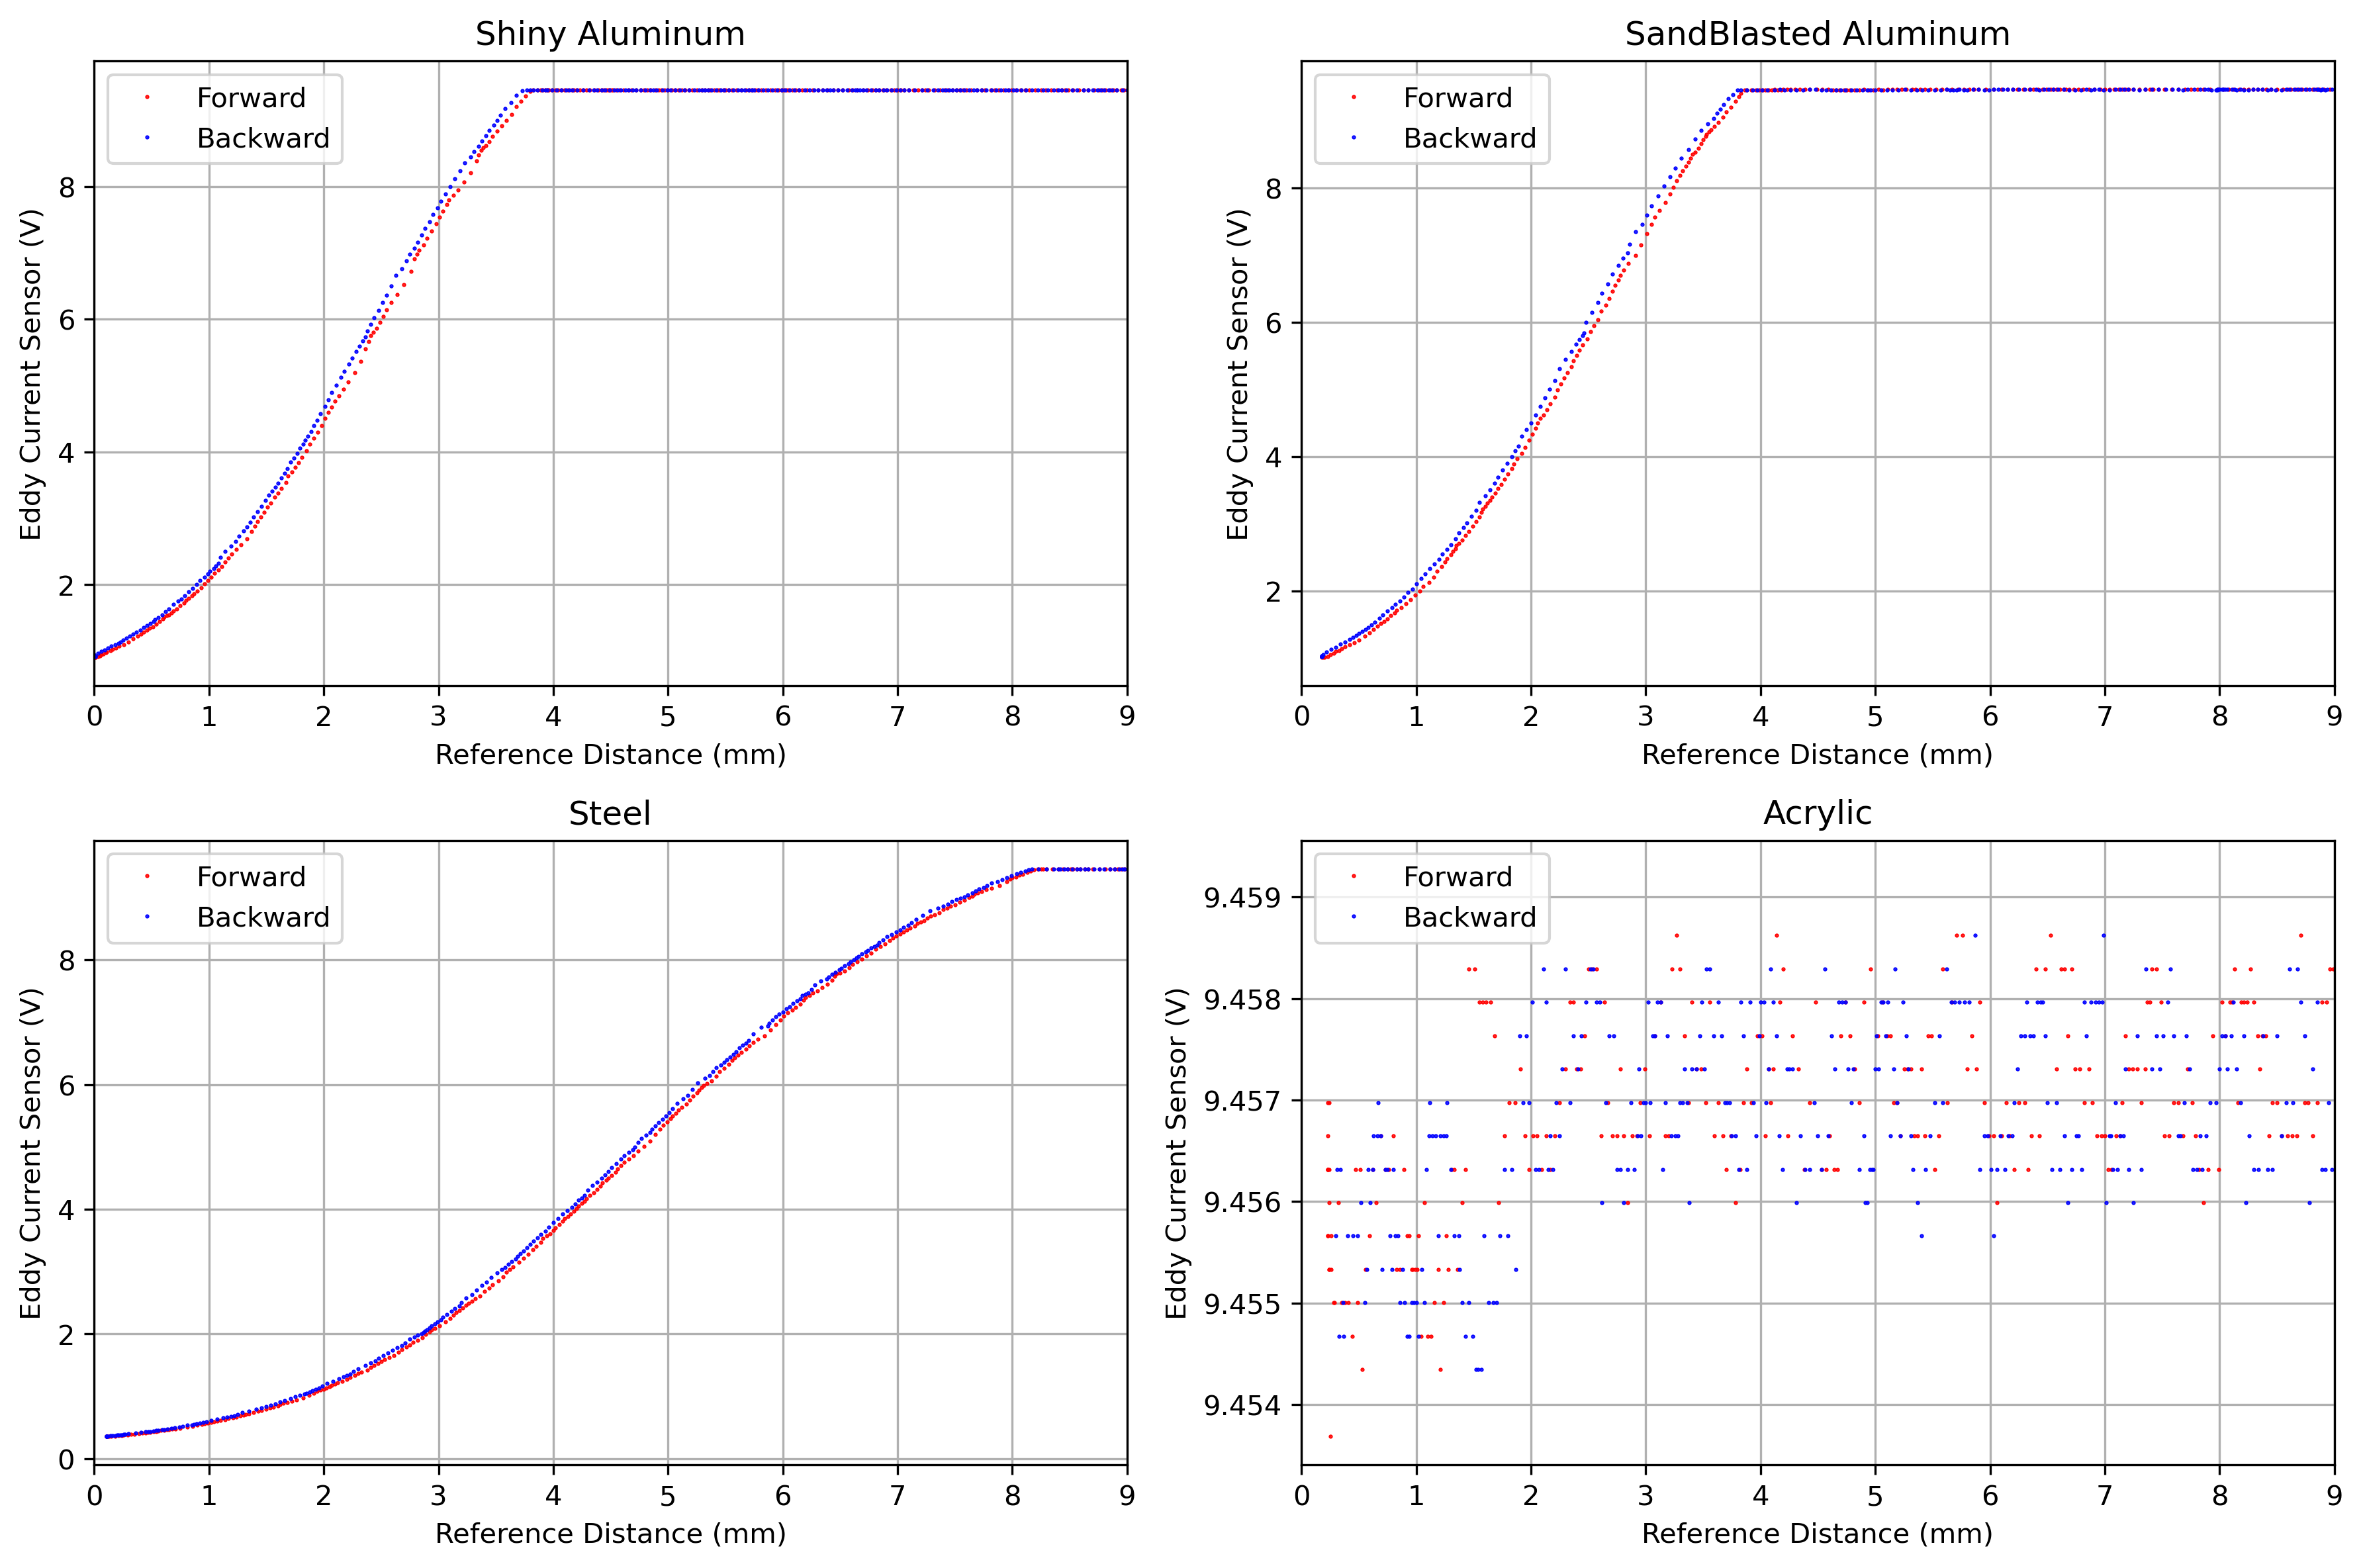

In [189]:
##Eddy Current Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 0, 9

# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('Eddy Current Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('Eddy Current Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('Eddy Current Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('Eddy Current Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

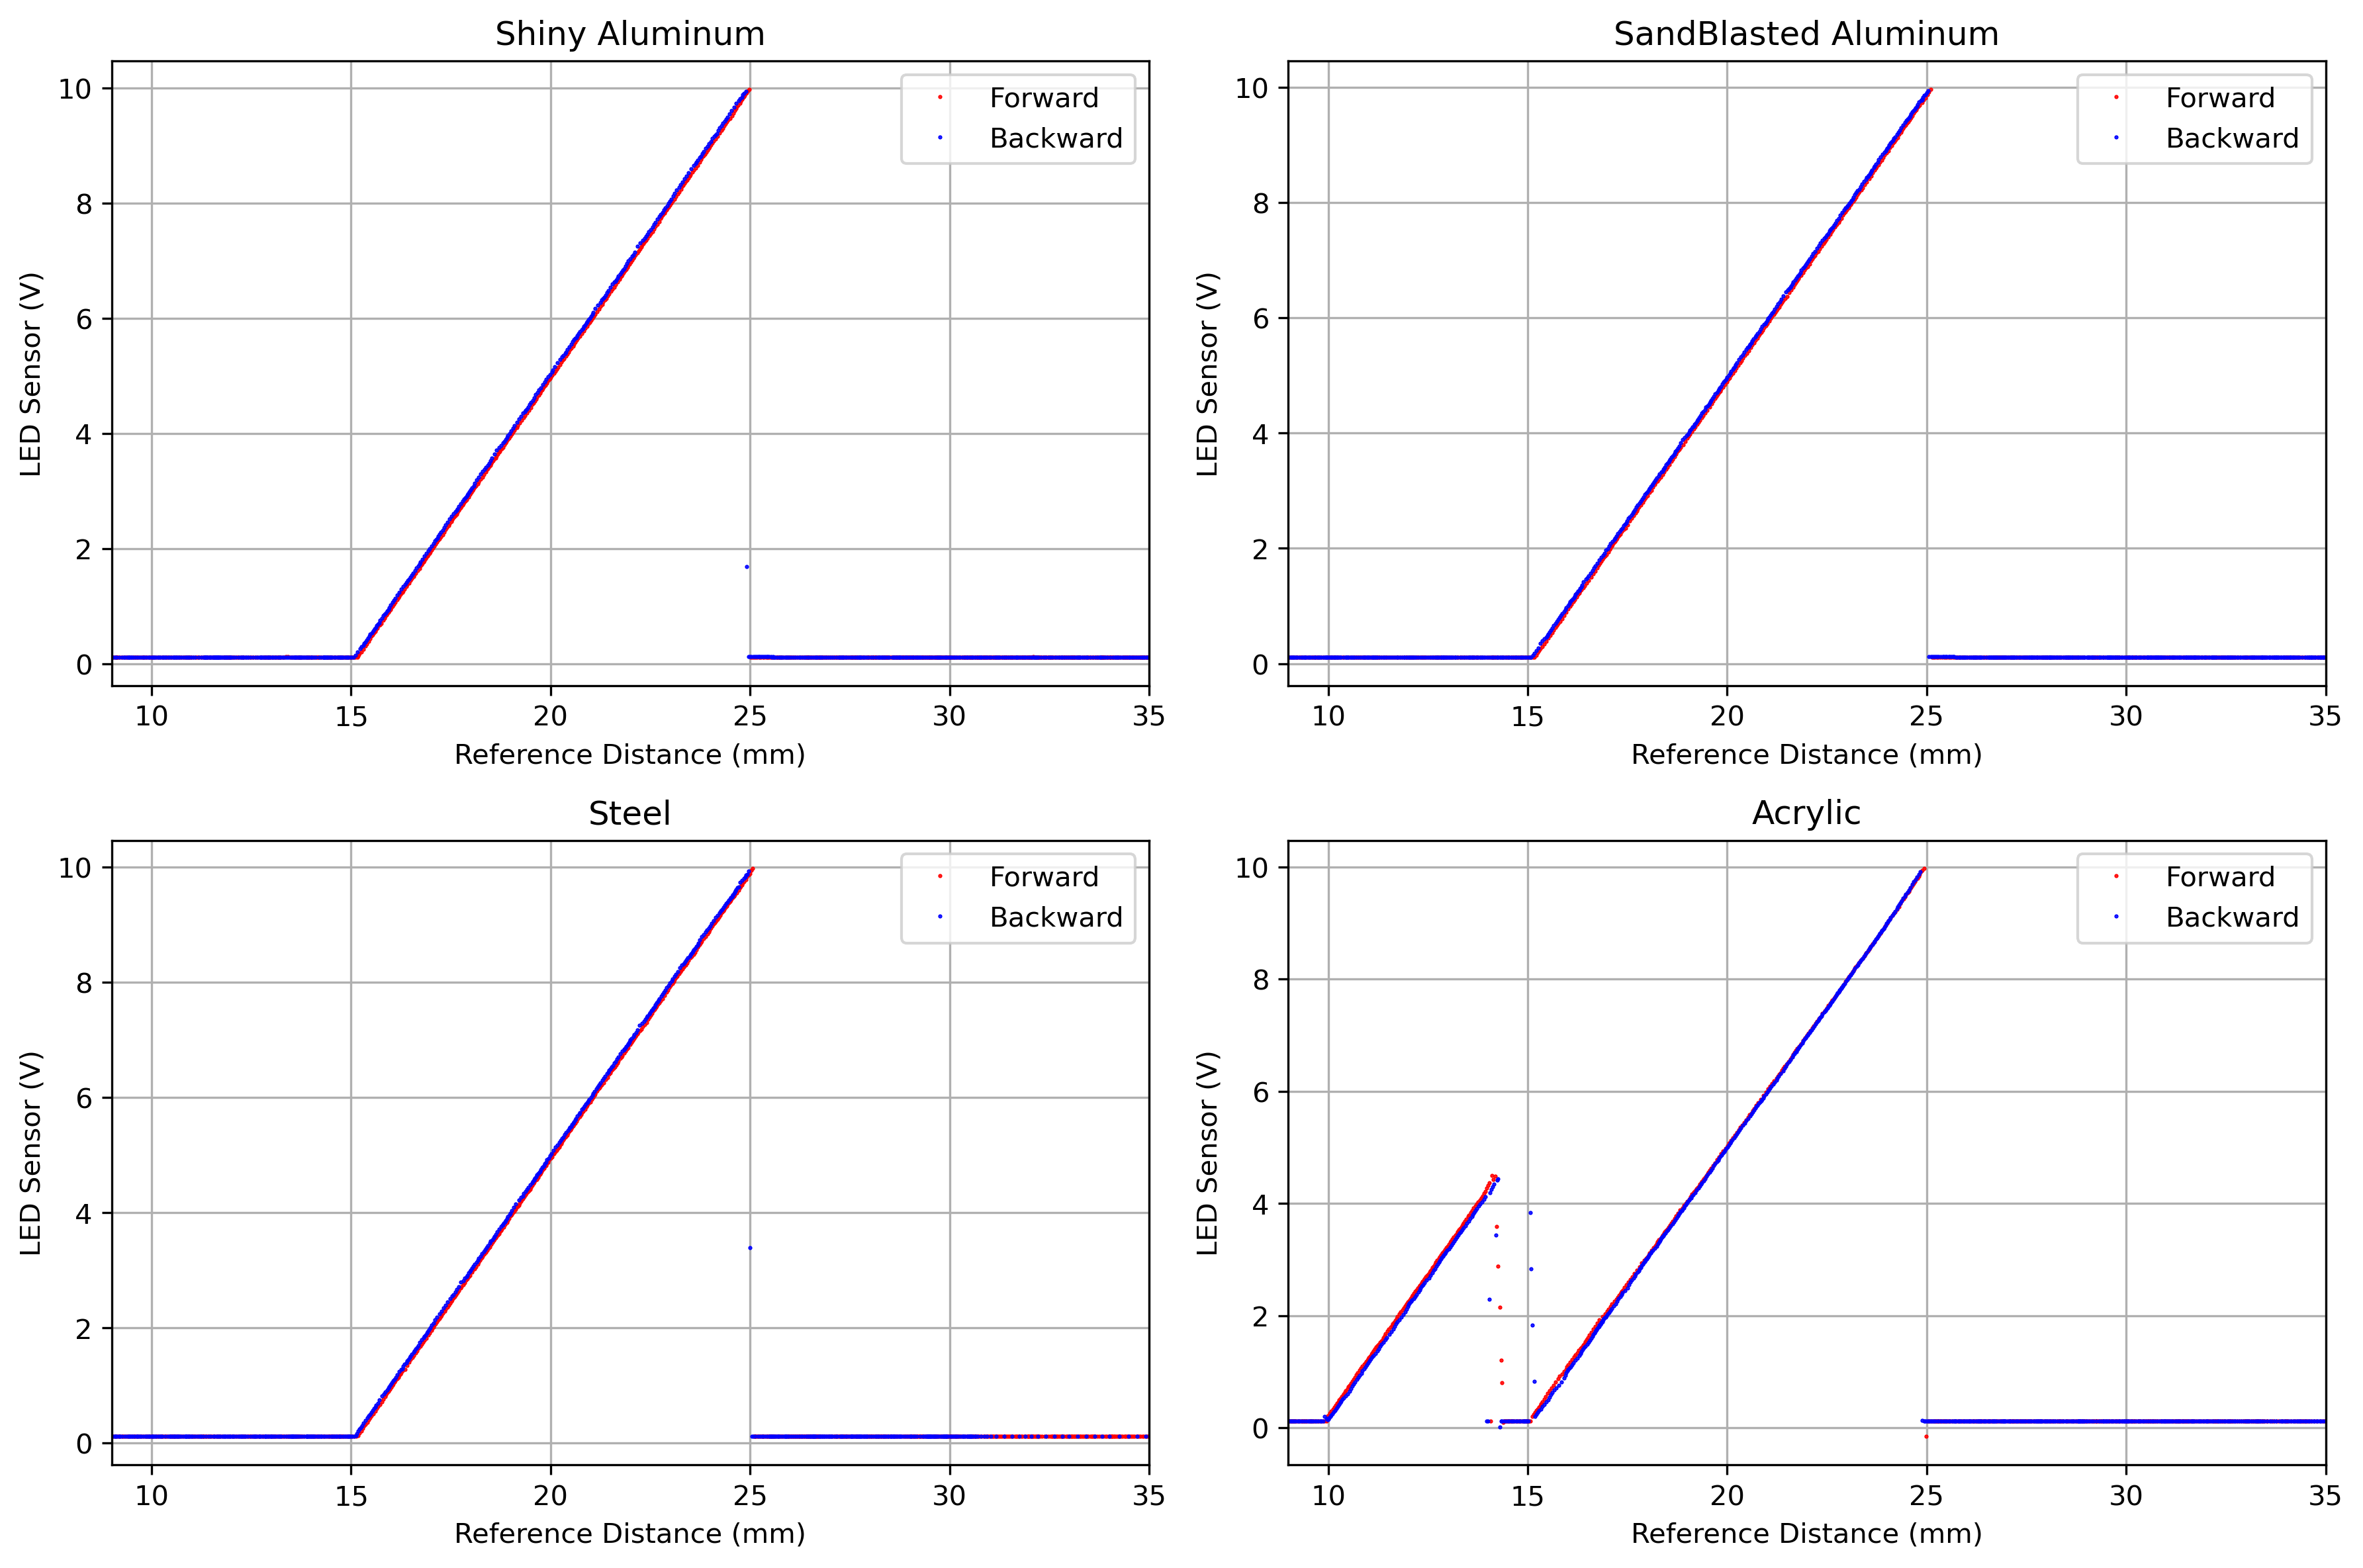

In [190]:
##LED Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 9, 35

# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('LED Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('LED Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('LED Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('LED Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [191]:
def filter_linear_region(distance, voltage, threshold=0.1):
    # Ensure there are no duplicate distance values (add small offset to duplicates)
    distance_unique, idx = np.unique(distance, return_index=True)
    
    # Use iloc to access rows by index in pandas Series
    voltage_unique = voltage.iloc[idx]
    
    # Calculate the derivative
    dv_dx = np.gradient(voltage_unique, distance_unique)
    
    # Filter out invalid or NaN values from the derivative
    dv_dx = np.nan_to_num(dv_dx, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Find where the derivative drops below the threshold
    linear_region = np.where(dv_dx > threshold)[0]
    
    if len(linear_region) == 0:
        return distance, voltage
    
    # Get the index where linearity ends
    end_index = linear_region[-1]
    
    return distance_unique[:end_index+1], voltage_unique[:end_index+1]

# Use the filtered dataframes for hysteresis calculation for filtered LED sensor data
def calculate_hysteresis_error(forward_data, backward_data, sensor_column, tolerance=0.01):
    forward_data['Reference Distance (mm)'] = forward_data['Reference Distance (mm)'].round(decimals=2)
    backward_data['Reference Distance (mm)'] = backward_data['Reference Distance (mm)'].round(decimals=2)
    
    # Merge forward and backward data with tolerance
    merged_data = pd.merge_asof(forward_data.sort_values('Reference Distance (mm)'),
                                backward_data.sort_values('Reference Distance (mm)'),
                                on='Reference Distance (mm)',
                                tolerance=tolerance,
                                suffixes=('_forward', '_backward'))
    
    merged_data.dropna(inplace=True)
    
    merged_data['difference'] = abs(merged_data[f'{sensor_column}_forward'] - merged_data[f'{sensor_column}_backward'])
    max_difference = merged_data['difference'].max()
    
    sensor_min = min(merged_data[f'{sensor_column}_forward'].min(), merged_data[f'{sensor_column}_backward'].min())
    sensor_max = max(merged_data[f'{sensor_column}_forward'].max(), merged_data[f'{sensor_column}_backward'].max())
    sensor_range = sensor_max - sensor_min
    
    hysteresis_error = (max_difference / sensor_range) * 100
    
    return hysteresis_error

def calculate_hysteresis_errors(forward_data, backward_data, sensor_column):
    # Merge forward and backward data on distance
    merged_data = pd.merge(forward_data, backward_data, on='Reference Distance (mm)', suffixes=('_forward', '_backward'))
    
    # Calculate difference at each point
    merged_data['difference'] = abs(merged_data[f'{sensor_column}_forward'] - merged_data[f'{sensor_column}_backward'])
    
    # Find maximum difference
    max_difference = merged_data['difference'].max()
    
    # Calculate sensor's range
    sensor_min = min(merged_data[f'{sensor_column}_forward'].min(), merged_data[f'{sensor_column}_backward'].min())
    sensor_max = max(merged_data[f'{sensor_column}_forward'].max(), merged_data[f'{sensor_column}_backward'].max())
    sensor_range = sensor_max - sensor_min
    
    # Calculate hysteresis as percentage of sensor's range
    hysteresis_error = (max_difference / sensor_range) * 100
    
    return hysteresis_error

# Function to calculate hysteresis error for all materials
def calculate_all_hysteresis_errors(sensor_column):
    materials = [
        ('Shiny Aluminum', Al_shinyforward, Al_shinybackward),
        ('Sandblasted Aluminum', Al_sandforward, Al_sandbackward),
        ('Steel', Steelforward, Steelbackward),
        ('Acrylic', Acrylicforward, Acrylicbackward)
    ]
    
    errors = {}
    for material, forward, backward in materials:
        error = calculate_hysteresis_errors(forward, backward, sensor_column)
        errors[material] = error
    
    return errors

# Calculate hysteresis errors for each sensor
ir_errors = calculate_all_hysteresis_errors('IR Sensor (V)')
capacitive_errors = calculate_all_hysteresis_errors('Capacitive Sensor (V)')
eddy_errors = calculate_all_hysteresis_errors('Eddy Current Sensor (V)')
led_errors = calculate_all_hysteresis_errors('LED Sensor (V)')

# Apply filtering and store results in separate dataframes for LED Sensor
filtered_shiny_forward_distance, filtered_shiny_forward_voltage = filter_linear_region(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['LED Sensor (V)'])
filtered_shiny_backward_distance, filtered_shiny_backward_voltage = filter_linear_region(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['LED Sensor (V)'])

filtered_sand_forward_distance, filtered_sand_forward_voltage = filter_linear_region(Al_sandforward['Reference Distance (mm)'], Al_sandforward['LED Sensor (V)'])
filtered_sand_backward_distance, filtered_sand_backward_voltage = filter_linear_region(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['LED Sensor (V)'])

filtered_Steel_forward_distance, filtered_Steel_forward_voltage = filter_linear_region(Steelforward['Reference Distance (mm)'], Steelforward['LED Sensor (V)'])
filtered_Steel_backward_distance, filtered_Steel_backward_voltage = filter_linear_region(Steelbackward['Reference Distance (mm)'], Steelbackward['LED Sensor (V)'])

filtered_Acrylic_forward_distance, filtered_Acrylic_forward_voltage = filter_linear_region(Acrylicforward['Reference Distance (mm)'], Acrylicforward['LED Sensor (V)'])
filtered_Acrylic_backward_distance, filtered_Acrylic_backward_voltage = filter_linear_region(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['LED Sensor (V)'])


# Create new dataframes with filtered data
filtered_shiny_forward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_shiny_forward_distance,
    'LED Sensor (V)': filtered_shiny_forward_voltage
})

filtered_shiny_backward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_shiny_backward_distance,
    'LED Sensor (V)': filtered_shiny_backward_voltage
})

# Create new dataframes with filtered data
filtered_sand_forward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_sand_forward_distance,
    'LED Sensor (V)': filtered_sand_forward_voltage
})

filtered_sand_backward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_sand_backward_distance,
    'LED Sensor (V)': filtered_sand_backward_voltage
})
# Create new dataframes with filtered data
filtered_Steel_forward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_Steel_forward_distance,
    'LED Sensor (V)': filtered_Steel_forward_voltage
})

filtered_Steel_backward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_Steel_backward_distance,
    'LED Sensor (V)': filtered_Steel_backward_voltage
})
# Create new dataframes with filtered data
filtered_Acrylic_forward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_Acrylic_forward_distance,
    'LED Sensor (V)': filtered_Acrylic_forward_voltage
})

filtered_Acrylic_backward_df = pd.DataFrame({
    'Reference Distance (mm)': filtered_Acrylic_backward_distance,
    'LED Sensor (V)': filtered_Acrylic_backward_voltage
})

# Example of calculating hysteresis errors using the new filtered data
led_errors_shiny = calculate_hysteresis_error(filtered_shiny_forward_df, filtered_shiny_backward_df, 'LED Sensor (V)')
led_errors_sand = calculate_hysteresis_error(filtered_sand_forward_df, filtered_sand_backward_df, 'LED Sensor (V)')
led_errors_Steel = calculate_hysteresis_error(filtered_Steel_forward_df, filtered_Steel_backward_df, 'LED Sensor (V)')
led_errors_Acrylic = calculate_hysteresis_error(filtered_Acrylic_forward_df, filtered_Acrylic_backward_df, 'LED Sensor (V)')

# Print results
print("Hysteresis Errors (%)")
print("IR Sensor:", ir_errors)
print("Capacitive Sensor:", capacitive_errors)
print("Eddy Current Sensor:", eddy_errors)
# print("LED Sensor:", led_errors)
print("LED Sensor Shiny Al:", led_errors_shiny)
print("LED Sensor Sand Al:", led_errors_sand)
print("LED Sensor Steel:", led_errors_Steel)
print("LED Sensor Acrylic:", led_errors_Acrylic)


Hysteresis Errors (%)
IR Sensor: {'Shiny Aluminum': 3.8121570238301783, 'Sandblasted Aluminum': 3.602484501602902, 'Steel': 3.880118397774273, 'Acrylic': 2.1161147694977642}
Capacitive Sensor: {'Shiny Aluminum': 99.93849326283582, 'Sandblasted Aluminum': 99.9077405352564, 'Steel': 99.88727376382272, 'Acrylic': 99.93849920404007}
Eddy Current Sensor: {'Shiny Aluminum': 2.9484122244409594, 'Sandblasted Aluminum': 4.227008584547154, 'Steel': 1.574865716938113, 'Acrylic': 66.66666666670265}
LED Sensor Shiny Al: 1.246514197783639
LED Sensor Sand Al: 0.9301639619070086
LED Sensor Steel: 1.062452447018484
LED Sensor Acrylic: 42.67297605717088


Fitted parameters: a = -15.06873450992492, b = 1.001763174752221
R^2 score: 1.00


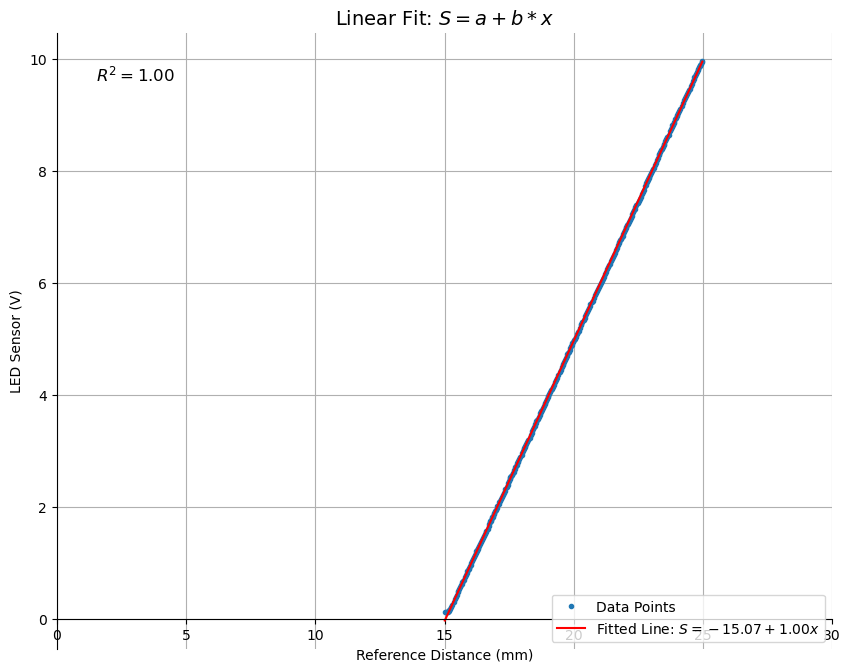

In [192]:
from scipy.optimize import curve_fit

# Define the linear model function to fit
def model_function(x, a, b):
    # Linear model: S = a + b*x
    return a + b*x

# Initial guess for the parameters (intercept and slope)
initial_guess = [1, 1]

# Removed linear elements
def filter_by_x_range(df, x_column, min_x, max_x):
    """
    Filters the dataframe to keep only rows where the x_column is between min_x and max_x.
    """
    return df[(df[x_column] >= min_x) & (df[x_column] <= max_x)]

# Define the minimum and maximum x-values (Reference Distance in mm) for filtering
min_x_value = 15  # Change this value as needed
max_x_value = 25  # Change this value as needed

# Apply the filtering function to your dataframes
filtered_shiny_forward_df = filter_by_x_range(Al_shinyforward, 'Reference Distance (mm)', min_x_value, max_x_value)
filtered_shiny_backward_df = filter_by_x_range(Al_shinybackward, 'Reference Distance (mm)', min_x_value, max_x_value)

# Use curve_fit to fit the linear model to the data
popt, pcov = curve_fit(model_function, filtered_shiny_forward_df['Reference Distance (mm)'], filtered_shiny_forward_df['LED Sensor (V)'], p0=initial_guess)

# Get the fitted parameters
a, b = popt

# Formatted to 2 decimal places
a_formatted = f'{a:.2f}'
b_formatted = f'{b:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(filtered_shiny_forward_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(filtered_shiny_forward_df['LED Sensor (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: a = {a}, b = {b}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10,8))  # Keep the figure size

# Plot the data points and fitted curve
ax.plot(filtered_shiny_forward_df['Reference Distance (mm)'], filtered_shiny_forward_df['LED Sensor (V)'], marker='o', label='Data Points', markersize=3, linestyle='None')  # Adjust marker size
ax.plot(filtered_shiny_forward_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: $S = {a_formatted} + {b_formatted}x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Adjust x and y limits to minimize blank space
# ax.set_xlim(min(filtered_shiny_forward_df['Reference Distance (mm)']) - 1, max(filtered_shiny_forward_df['Reference Distance (mm)']) + 0.5)
ax.set_xlim(0, 30)
# ax.set_ylim(min(filtered_shiny_forward_df['LED Sensor (V)']) - 2, max(filtered_shiny_forward_df['LED Sensor (V)']) + 1)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('LED Sensor (V)')
ax.set_title(rf'Linear Fit: $S = a + b*x$', fontsize=14)

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.05, 0.95, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Display the legend
ax.legend(loc='lower right')

# Show the plot
plt.show()

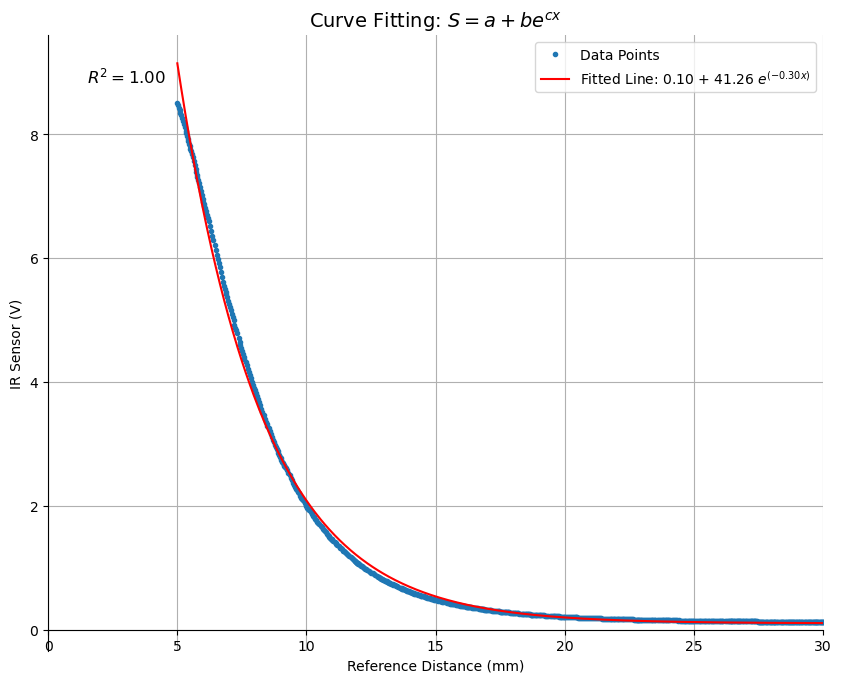

Fitted parameters: a = 0.10260134724617932, b = 41.2603583213572, c = -0.3035514296585003
R^2 score: 1.00


In [197]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# Define the exponential model function to fit
def model_function_exponential(x, a, b, c):
    # Exponential model: S = a + b * e^(c * x)
    return a + b * np.exp(c * x)

# Initial guess for the parameters (a, b, c)
initial_guess = [1, 1, -1]  # Experiment with different initial values for 'a', 'b', and 'c'

# Define the minimum and maximum x-values (Reference Distance in mm) for filtering
min_x_value = 5  # Adjust this value as needed
max_x_value = 35  # Adjust this value as needed

# Filtering function (assumes you have Al_shinyforward and Al_shinybackward as DataFrames)
def filter_by_x_range(df, column_name, min_value, max_value):
    return df[(df[column_name] >= min_value) & (df[column_name] <= max_value)]

# Apply the filtering function to your dataframes
filtered_shiny_forward_df = filter_by_x_range(Al_shinyforward, 'Reference Distance (mm)', min_x_value, max_x_value)

# Use curve_fit to fit the exponential model to the data
popt, pcov = curve_fit(model_function_exponential, filtered_shiny_forward_df['Reference Distance (mm)'], filtered_shiny_forward_df['IR Sensor (V)'], p0=initial_guess)

# Get the fitted parameters
a, b, c = popt

# Formatted parameters for display
a_formatted = f'{a:.2f}'
b_formatted = f'{b:.2f}'
c_formatted = f'{c:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function_exponential(filtered_shiny_forward_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(filtered_shiny_forward_df['IR Sensor (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))  # Keep the figure size

# Plot the data points and fitted curve
ax.plot(filtered_shiny_forward_df['Reference Distance (mm)'], filtered_shiny_forward_df['IR Sensor (V)'], marker='o', label='Data Points', markersize=3, linestyle='None')  # Adjust marker size
ax.plot(filtered_shiny_forward_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: {a_formatted} + {b_formatted} $e^{{({c_formatted} x)}}$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set x and y limits
ax.set_xlim(0, 30)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('IR Sensor (V)')
ax.set_title(rf'Curve Fitting: $S = a + b e^{{cx}}$', fontsize=14)

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.05, 0.95, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Display the legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

# Print fitted parameters and R^2 score
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")
print(f"R^2 score: {r2_formatted}")
